In [ ]:
import platform
import tensorflow as tf
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers, models
from tensorflow.keras.applications import DenseNet169
import os

data_dir = '/kaggle/input/brain-tumor-mri-images-44c'
if platform.system() == 'Darwin':
    data_dir = './dataset'

BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
EPOCHS = 20
VALIDATION_SPLIT = 0.2
SEED = 42

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

Found 4478 files belonging to 44 classes.
Using 3583 files for training.
Found 4478 files belonging to 44 classes.
Using 895 files for validation.
51877672/51877672 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 207s 2s/step - loss: 4.0069 - sparse_categorical_accuracy: 0.1513 - val_loss: 2.4893 - val_sparse_categorical_accuracy: 0.3754
Epoch 2/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - loss: 2.2719 - sparse_categorical_accuracy: 0.4072 - val_loss: 2.0353 - val_sparse_categorical_accuracy: 0.4425
Epoch 3/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - loss: 1.8985 - sparse_categorical_accuracy: 0.4879 - val_loss: 1.7975 - val_sparse_categorical_accuracy: 0.5218
Epoch 4/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - loss: 1.5268 - sparse_categorical_accuracy: 0.5788 - val_loss: 1.6675 - val_sparse_categorical_accuracy: 0.5207
Epoch 5/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - loss: 1.3534 - sparse_categorical_accuracy: 0.6226 - val_loss: 1.3923 - val_spa

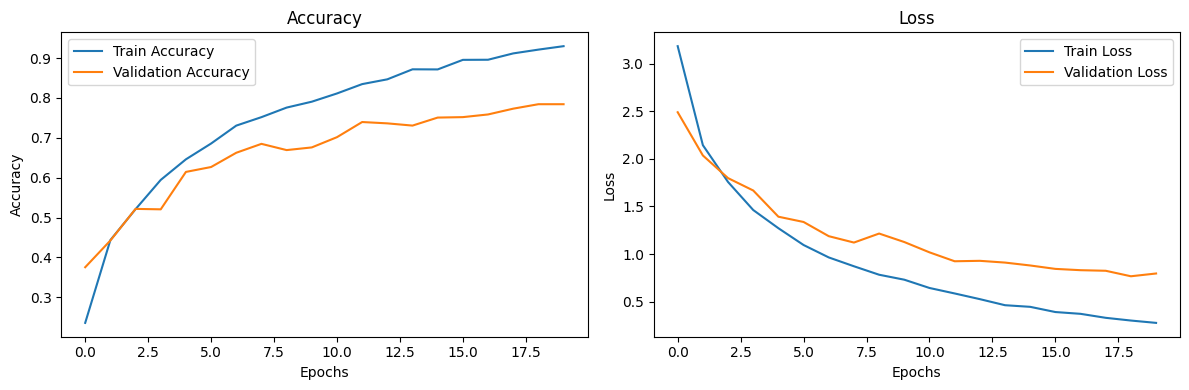

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 

2024-11-22 21:22:25.701744: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


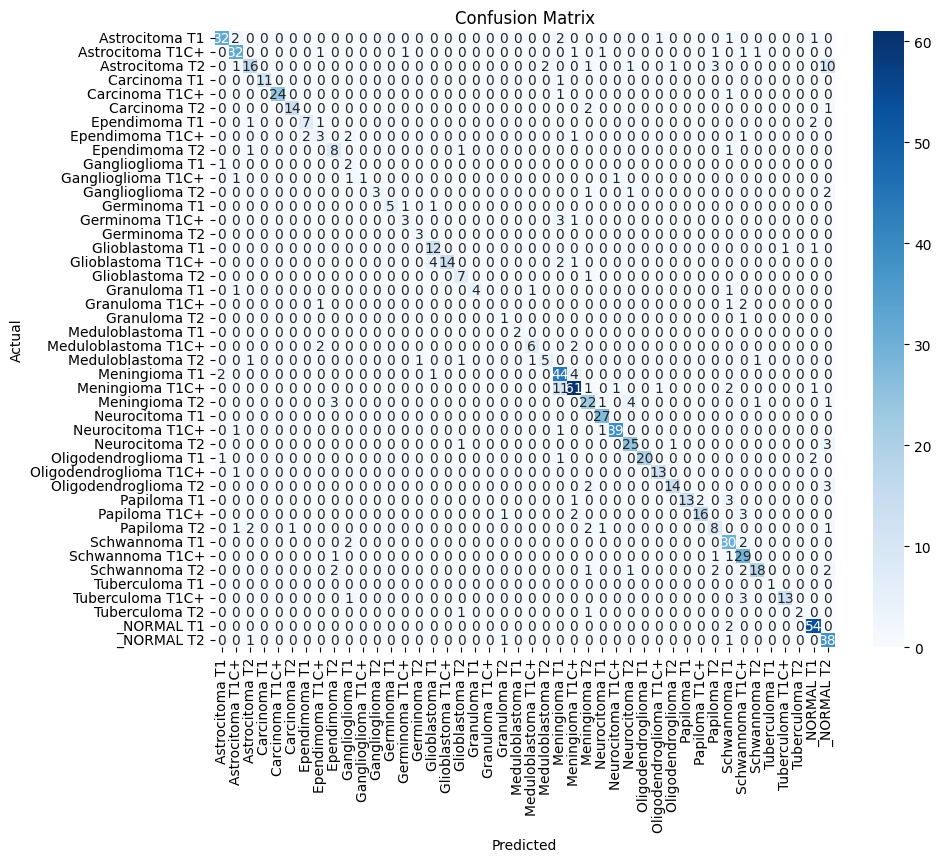

Weighted F1 Score: 0.7815


In [6]:
# Train ML model

train_ds = image_dataset_from_directory(
    data_dir,
    validation_split=VALIDATION_SPLIT,
    subset="training",
    seed=SEED,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE)

val_ds = image_dataset_from_directory(
    data_dir,
    validation_split=VALIDATION_SPLIT,
    subset="validation",
    seed=SEED,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE)

base_model = DenseNet169(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(44, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)

def plot_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['sparse_categorical_accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_history(history)

val_labels = []
val_preds = []

for images, labels in val_ds:
    preds = model.predict(images)
    val_labels.extend(labels.numpy())
    val_preds.extend(np.argmax(preds, axis=1))

cm = confusion_matrix(val_labels, val_preds)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=train_ds.class_names, yticklabels=train_ds.class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

f1 = f1_score(val_labels, val_preds, average='weighted')
print(f'Weighted F1 Score: {f1:.4f}')


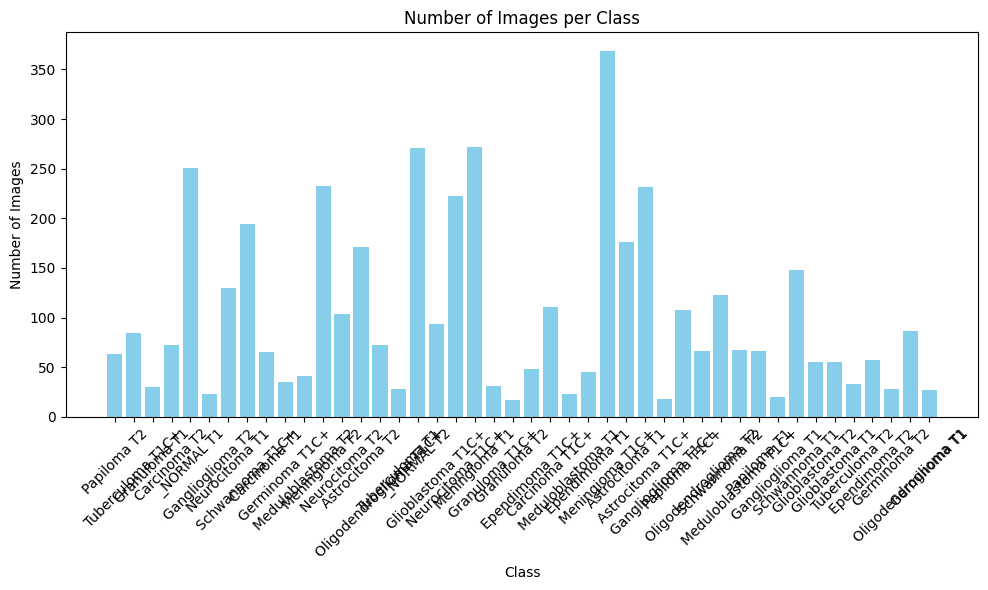

In [ ]:

class_counts = {}
for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len([name for name in os.listdir(class_path) if name.endswith('.jpeg') or name.endswith('.jpg')])

plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title('Number of Images per Class')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
